# AlexNet(2012)의 개요 및 특징
- 활성화 함수로 `ReLU` 사용
  - 기존과는 달리 softmax를 사용하지 않음!
- `MaxPooling` 적용
- `LRN(Local Response Normalization)`
  - 지금은 LRN 사용 거의 안함
  - 출력값 정규화시키는 방법
  - 지금에 와서는 `Batch Normaliztion` 으로 대체
  - `Dropout`
  - `Data Augmentation`

**receptive field**
- filter가 input featuremap을 지나다니면서 지나다닌 궤적을 나타냄. 
- 아래 그림에서 색칠된 장소는 필터가 스캔할 때 제일 많이 본 구간= 하얀, 그 담으로 많이 본 = 주황, 그다음=연두. 
- 주황색으로 나온 결과가 pool..
- filter의 크기가 커지면 pool이 늘어남
- filter의 크기가 커지면 쓸모없이 너무 많은 것을 봄.
- AlexNet의 컨셉: 한번에 많은걸 확인해보자 (11,11), 보는 범위를 늘리자.


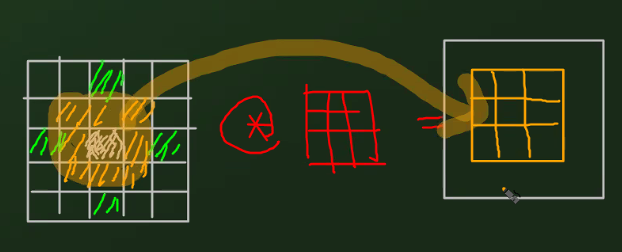

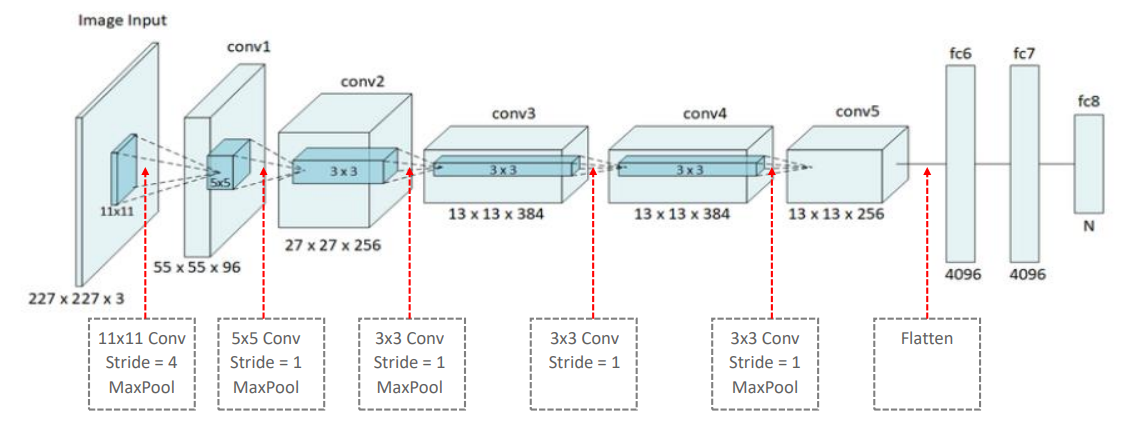

* `(11, 11)`, `(5, 5)` 같은 ⭐큰 사이즈⭐의 커널을 사용
  * 커널의 크기가 큰 대신 `strides`를 늘렸다.
  * 층을 얇게 쌓았음

- Alex의 단점: 파라미터 too much



In [1]:
# Feature Extraction을 위한 레이어
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

# Fully Connected Layer를 위한 레이어
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten

In [2]:
# 입력층 만들기
input = Input(shape=(227, 227, 3))

# Feature Extraction
# 첫 번째 층의 Conv - 커널 크기 : (11, 11), stride=(4, 4), padding='valid'
x = Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid')(input)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x) # 여기가 약간 특이함

# 두 번째 층의 Conv - Conv-ReLU-BN-MaxPooling - 커널 크기가 (5, 5) 필터 개수 256, 패딩 적용
x = Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# 3x3 Conv을 2번 연속으로 수행
x = Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)

# 3x3 Conv을 2번 연속으로 수행
x = Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)

# 3x3 Conv, filters=256, MaxPooling
x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

# FCL
x = Flatten()(x) # F.E 결과의 채널 수가 512개 보다 작으니까 flatten으로 수행

x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# 출력층 설정
output = Dense(10, activation='softmax')(x)